# Parte 0: Funzioni

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
def fit_predict_print(train, test, target_columns, estimator):
  X_tr = train.drop(columns=target_columns)
  y_tr = train[target_columns]
  X_ts = test.drop(columns=target_columns)
  y_ts = test[target_columns]

  return fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, estimator)


def fit_predict_print_1(X_train, X_test, y_train, y_test, estimator):
  y_pred = estimator.fit(X_train, y_train).predict(X_test)

  print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
  print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
  return y_test, y_pred

In [ ]:
def balanced_subsample(X, y, subsample_size=1.0):

    classes = y.unique()
    min_elems = y.value_counts().min()

    use_elems = min_elems
    if subsample_size < 1:
        use_elems = int(min_elems * subsample_size)

    Xb = pd.DataFrame()
    yb = pd.Series()

    for c in classes:
      X_ = X[y == c]
      if X_.shape[0] > use_elems:
        X_ = X_.sample(use_elems)

      yc = np.empty(use_elems)
      yc.fill(c)
      y_ = pd.Series(yc)

      Xb = pd.concat([Xb, X_])
      yb = pd.concat([yb, y_])

    return Xb, yb

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(dataset, columns, drop=None):

  categories = []
  ret_columns = []

  if isinstance(columns, str):
    columns = [columns]
  if (drop is not None) and (isinstance(drop, str)):
    drop = [drop]

  for i in range(0, len(columns)):
    ctg = dataset.loc[:, columns[i]].unique().tolist()
    categories.append(ctg)

    ctg_ = ctg.copy();
    if drop is not None:
      ctg_.remove(drop[i])
    ret_columns += ctg_

  encoder = OneHotEncoder(categories=categories, drop=drop).fit(dataset[columns])
  ds = pd.DataFrame(encoder.transform(dataset[columns]).toarray(), columns=ret_columns)

  return ds


def add_dummies(dataset, columns, drop_cat=None, drop_col=True):
  dummies = one_hot_encode(dataset, columns, drop_cat)
  if drop_col:
    dataset.drop(columns=columns, inplace=True)
  dataset = pd.concat([dataset, dummies], axis=1)
  return dataset

In [ ]:
def xtab(dataset, index_col, columns_col, normalize_on_idx=False):
  xtab = pd.crosstab(dataset[index_col], dataset[columns_col])
  if normalize_on_idx:
    for i in xtab.index:
      xtab.loc[i] = xtab.loc[i] / len(dataset[dataset[index_col] == i])
    _ = sns.heatmap(xtab, vmin=0, vmax=1)
  else:
    _ = sns.heatmap(xtab)
  print(xtab)
  return xtab

# Parte 1: Analisi

1

In [ ]:
dataset = pd.read_csv('weather.csv', sep=';')
dataset.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No


2

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14468 entries, 0 to 14467
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          14468 non-null  int64  
 1   Location       14468 non-null  object 
 2   MinTemp        14468 non-null  float64
 3   MaxTemp        14468 non-null  float64
 4   Rainfall       14468 non-null  float64
 5   WindGustSpeed  14468 non-null  int64  
 6   WindSpeed9am   14468 non-null  int64  
 7   WindSpeed3pm   14468 non-null  int64  
 8   Humidity9am    14468 non-null  int64  
 9   Humidity3pm    14468 non-null  int64  
 10  Pressure9am    14468 non-null  float64
 11  Pressure3pm    14468 non-null  float64
 12  Cloud3pm       14468 non-null  int64  
 13  Temp9am        14468 non-null  float64
 14  Temp3pm        14468 non-null  float64
 15  RainToday      14468 non-null  object 
 16  RainTomorrow   14468 non-null  object 
dtypes: float64(7), int64(7), object(3)
memory usage: 1

In [ ]:
dataset.RainTomorrow.value_counts()

No     11038
Yes     3430
Name: RainTomorrow, dtype: int64

In [ ]:
dataset.Location.value_counts()

Adelaide            366
MelbourneAirport    366
Albury              366
Perth               365
Mildura             365
Darwin              364
Dartmoor            364
Nhil                364
PerthAirport        363
Wollongong          363
NorahHead           363
SydneyAirport       363
Bendigo             362
Hobart              361
Richmond            360
Portland            360
Nuriootpa           358
Ballarat            358
AliceSprings        356
Canberra            355
Brisbane            355
PearceRAAF          354
Woomera             353
Townsville          352
Tuggeranong         352
WaggaWagga          349
Sydney              349
Watsonia            348
MountGambier        346
Witchcliffe         345
CoffsHarbour        345
BadgerysCreek       343
Sale                332
Uluru               332
Walpole             327
NorfolkIsland       326
Moree               312
GoldCoast           306
Williamtown         300
Cairns              295
Cobar               260
Melbourne       

3

Month             1   2   3   4   5   6   7   8   9   10  11  12
Location                                                        
Adelaide          31  29  31  30  31  30  31  31  30  31  30  31
Albury            31  29  31  30  31  30  31  31  30  31  30  31
AliceSprings      31  29  31  29  30  30  30  31  30  30  30  25
BadgerysCreek     28  29  31  30  31  30  31  31  29  31  29  13
Ballarat          29  27  30  30  31  29  31  31  30  30  30  30
Bendigo           29  27  31  30  31  30  31  31  30  31  30  31
Brisbane          27  26  31  30  31  30  31  30  30  31  27  31
Cairns            30  29  31  29  19  30  31  31  10  20  23  12
Canberra          31  29  31  30  30  30  31  31  30  31  27  24
Cobar             28  29  29  30  31  30  31  31  21   0   0   0
CoffsHarbour      29  28  29  29  30  28  30  30  28  31  23  30
Dartmoor          29  29  31  30  31  30  31  31  30  31  30  31
Darwin            31  29  31  30  31  30  31  31  30  31  30  29
GoldCoast         19  25 

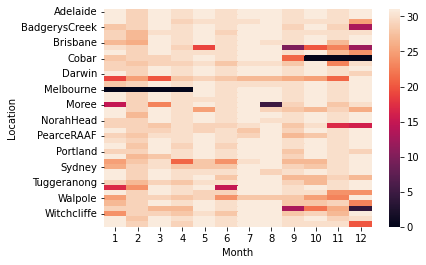

In [ ]:
_ = xtab(dataset, 'Location', 'Month')

4

In [ ]:
humidity = dataset[['Month', 'Location']]

In [ ]:
humidity['humidity_max'] = np.maximum(dataset['Humidity9am'], dataset['Humidity3pm'])
humidity['humidity_min'] = np.minimum(dataset['Humidity9am'], dataset['Humidity3pm'])
humidity.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Month,Location,humidity_max,humidity_min
0,1,Albury,46,17
1,1,Albury,54,30
2,1,Albury,67,62
3,1,Albury,74,65
4,1,Albury,92,63


In [ ]:
humidity[['Location', 'Month', 'humidity_max']].groupby(['Location', 'Month']).max()

humidity_max
Location Month              
Adelaide 1                93
         2                76
         3                93
         4                84
         5                93
...                      ...
Woomera  8                92
         9                95
         10               92
         11               76
         12               81

[497 rows x 1 columns]

In [ ]:
humidity[['Location', 'Month', 'humidity_min']].groupby(['Location', 'Month']).min()

humidity_min
Location Month              
Adelaide 1                11
         2                13
         3                19
         4                15
         5                32
...                      ...
Woomera  8                13
         9                15
         10                4
         11                3
         12                7

[497 rows x 1 columns]

5

In [ ]:
dataset['TemperatureRange'] = dataset['MaxTemp'] - dataset['MinTemp']

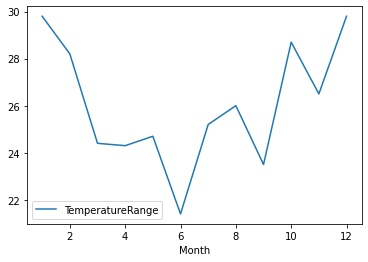

In [ ]:
dataset[['Month', 'TemperatureRange']].groupby('Month').max().plot()

# Parte 2: Trasformazione e Predizione

1

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

RainToday = ['No', 'Yes']
RainTomorrow = ['No', 'Yes']

categories = [RainToday, RainTomorrow]
columns = ['RainToday', 'RainTomorrow']

enc = OrdinalEncoder(categories=categories).fit(dataset[columns])
enc_ds = pd.DataFrame(enc.transform(dataset[columns]), columns=columns)

dataset = pd.concat([dataset.drop(columns=columns), enc_ds], axis=1)
dataset.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,TemperatureRange,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,17.2,0.0,0.0
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,12.7,0.0,1.0
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,4.7,1.0,1.0
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,6.4,1.0,1.0
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,7.4,1.0,0.0


In [ ]:
reduced = dataset[dataset['Cloud3pm'] >= 0]
reduced.drop(columns='Location', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train, test = train_test_split(reduced, train_size=.8, random_state=1)

In [ ]:
_ = fit_predict_print(train, test, 'RainTomorrow', LogisticRegression(n_jobs=-1))

Accuracy: 0.8046734571599761
Confusion matrix:
 [[1103   89]
 [ 237  240]]


In [ ]:
_ = fit_predict_print(train, test, 'RainTomorrow', DecisionTreeClassifier())

Accuracy: 0.7471539844218095
Confusion matrix:
 [[973 219]
 [203 274]]


2

In [ ]:
X = reduced.drop(columns='RainTomorrow')
y = reduced.RainTomorrow

In [ ]:
cross_val_score(LogisticRegression(n_jobs=-1), X, y, scoring='accuracy',
                cv=5, n_jobs=-1).mean()

0.8052480484156714

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy',
                cv=5, n_jobs=-1).mean()

0.7339398942200345

3

In [ ]:
reduced['Temp'] = (reduced.MaxTemp + reduced.MinTemp) / 2
reduced['WindSpeed'] = (reduced.WindSpeed9am + reduced.WindSpeed3pm) / 2
reduced.drop(columns=['MaxTemp', 'MinTemp', 'WindSpeed9am', 'WindSpeed3pm'],
             inplace=True)
reduced.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,Month,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,TemperatureRange,RainToday,RainTomorrow,Temp,WindSpeed
0,1,0.0,54,46,17,1013.4,1009.2,3,26.1,36.7,17.2,0.0,0.0,29.00,3.5
1,1,0.4,50,54,30,1011.1,1008.4,8,24.8,31.7,12.7,0.0,1.0,27.25,13.0
2,1,2.2,48,62,67,1014.0,1014.8,8,21.8,19.5,4.7,1.0,1.0,20.75,25.0
3,1,15.6,39,74,65,1017.9,1016.5,8,19.2,21.6,6.4,1.0,1.0,20.50,13.0
4,1,6.8,31,92,63,1016.3,1013.9,8,17.2,22.2,7.4,1.0,0.0,19.20,7.5


In [ ]:
train, test = train_test_split(reduced, train_size=.8, random_state=1)

In [ ]:
_ = fit_predict_print(train, test, 'RainTomorrow', LogisticRegression(n_jobs=-1))

Accuracy: 0.8010784901138406
Confusion matrix:
 [[1094   98]
 [ 234  243]]


In [ ]:
_ = fit_predict_print(train, test, 'RainTomorrow', DecisionTreeClassifier())

Accuracy: 0.7483523067705212
Confusion matrix:
 [[972 220]
 [200 277]]


In [ ]:
X = reduced.drop(columns='RainTomorrow')
y = reduced.RainTomorrow

In [ ]:
cross_val_score(LogisticRegression(n_jobs=-1), X, y, scoring='accuracy',
                cv=5, n_jobs=-1).mean()

0.8029708049019142

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy',
                cv=5, n_jobs=-1).mean()

0.7396925599125252

4

In [ ]:
cloudP = dataset[dataset['Cloud3pm'] < 0]
cloudT = dataset[dataset['Cloud3pm'] >= 0]
cloudP.drop(columns='Location', inplace=True)
cloudT.drop(columns='Location', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
XT = cloudT.drop(columns='Cloud3pm')
yT = cloudT.Cloud3pm
XP = cloudP.drop(columns='Cloud3pm')
yP = cloudP.Cloud3pm

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression(n_jobs=-1).fit(XT, yT)
cloudP['Cloud3pm'] = clf.predict(XP)
cloudP.Cloud3pm.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


count    6124.000000
mean        4.514187
std         1.476543
min         0.865502
25%         3.504590
50%         4.400578
75%         5.319375
max         9.696151
Name: Cloud3pm, dtype: float64

5

In [ ]:
clouds = pd.concat([cloudT, cloudP])
clouds.describe()

,Month,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,TemperatureRange,RainToday,RainTomorrow
count,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000
mean,6.482168,12.571793,23.402924,2.341492,40.375242,14.463437,19.146254,68.868745,51.949336,1016.854140,1014.381089,4.777985,17.261114,21.876265,10.831131,0.238112,0.237075
std,3.404448,6.231579,7.084502,8.091881,13.755842,8.628992,8.653345,18.629859,20.596100,7.053964,10.908566,2.299940,6.392711,6.931246,4.909139,0.425943,0.425303
min,1.000000,-5.500000,4.600000,0.000000,9.000000,0.000000,0.000000,4.000000,3.000000,982.000000,-1.000000,0.000000,-1.100000,1.700000,0.000000,0.000000,0.000000
25%,4.000000,7.900000,17.700000,0.000000,31.000000,9.000000,13.000000,57.000000,37.000000,1012.600000,1010.000000,3.000000,12.300000,16.400000,7.000000,0.000000,0.000000
50%,6.000000,12.200000,22.900000,0.000000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.000000,1014.700000,4.845976,16.800000,21.300000,10.100000,0.000000,0.000000
75%,9.000000,17.100000,28.600000,1.000000,48.000000,20.000000,24.000000,83.000000,66.000000,1021.300000,1018.925000,7.000000,21.900000,26.800000,14.200000,0.000000,0.000000
max,12.000000,29.200000,45.100000,225.000000,120.000000,65.000000,65.000000,100.000000,100.000000,1040.300000,1036.400000,9.696151,36.200000,43.500000,29.800000,1.000000,1.000000


In [ ]:
X = clouds.drop(columns='RainTomorrow')
y = clouds.RainTomorrow

In [ ]:
cross_val_score(LogisticRegression(n_jobs=-1), X, y, scoring='accuracy',
                cv=5, n_jobs=-1).mean()

0.8350169403017699

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy',
                cv=5, n_jobs=-1).mean()

0.7652135089560363

6

In [ ]:
dataset.drop(columns='Location', inplace=True)
X = dataset.drop(columns='RainTomorrow')
y = dataset.RainTomorrow

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, train_size=.8, random_state=1)

In [ ]:
clf = LinearRegression(n_jobs=-1).fit(X_tr, y_tr)
y_pr = np.around(clf.predict(X_ts))
metrics.accuracy_score(y_ts, y_pr)

0.8417415342087077